На основе датасета titanic обучить дерево решений.

Подобрать оптимальную глубину дерева так же, как мы делали на занятии.

Определить самые важные фичи.

Визуализировать полученное дерево.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Dropna не работает, значения все равно остаются, поэтому вручную
# train['Embarked'].dropna(inplace = True)
train.drop(index=61,axis=0, inplace=True)
train.drop(index=829,axis=0, inplace=True)

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
Xtrain = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Fare','Cabin'], axis=1)
Xtest = test.drop(['PassengerId', 'Name', 'Ticket', 'Fare','Cabin'], axis=1)
Xtrain['is_test'] = False
Xtest['is_test'] = True
X = pd.concat([Xtrain, Xtest], axis=0)
X.index = range(len(X))
X.columns = X.columns.str.lower()
X.head()

,pclass,sex,age,sibsp,parch,embarked,is_test
0,3,male,22.0,1,0,S,False
1,1,female,38.0,1,0,C,False
2,3,female,26.0,0,0,S,False
3,1,female,35.0,1,0,S,False
4,3,male,35.0,0,0,S,False


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1307 non-null   int64  
 1   sex       1307 non-null   object 
 2   age       1044 non-null   float64
 3   sibsp     1307 non-null   int64  
 4   parch     1307 non-null   int64  
 5   embarked  1307 non-null   object 
 6   is_test   1307 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 62.7+ KB


In [8]:
mean_age = int(X['age'].mean())
mean_age

29

In [9]:
X['age'].fillna(mean_age, inplace=True)

In [10]:
le = LabelEncoder()
y = le.fit_transform(train['Survived'])

In [11]:
X['age'] = X['age'].astype(int)

In [12]:
X = pd.get_dummies(X)
X.head()

,pclass,age,sibsp,parch,is_test,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,22,1,0,False,0,1,0,0,1
1,1,38,1,0,False,1,0,1,0,0
2,3,26,0,0,False,1,0,0,0,1
3,1,35,1,0,False,1,0,0,0,1
4,3,35,0,0,False,0,1,0,0,1


In [13]:
Xtrain_prep = X[~X['is_test']].drop('is_test', axis = 1)
Xtest_prep = X[X['is_test']].drop('is_test', axis = 1)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [15]:
depths = np.arange(1,10)
#features_num = np.arange(5,15)
grid = {'max_depth': depths}#, 'max_features': features_num}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='neg_log_loss', cv=5)

In [16]:
gridsearch.fit(Xtrain_prep, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_log_loss')

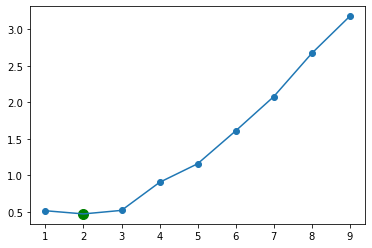

In [17]:
scores = [-x for x in gridsearch.cv_results_['mean_test_score']]
plt.plot(depths, scores)
plt.scatter(depths, scores)
best_point = np.argmin(scores)
plt.scatter(depths[best_point], scores[best_point], c='g', s=100)

In [18]:
clf_final = DecisionTreeClassifier(max_depth=2)

In [19]:
clf_final.fit(Xtrain_prep, y)

DecisionTreeClassifier(max_depth=2)

In [20]:
y_pred_proba = clf_final.predict_proba(Xtest_prep)
y_pred = clf_final.predict(Xtest_prep)

''

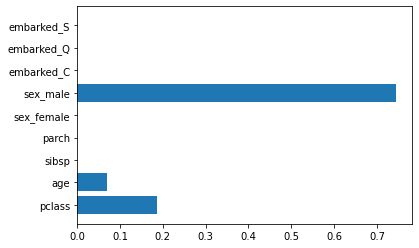

In [21]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(Xtrain_prep, y)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(Xtrain_prep.columns)),Xtrain_prep.columns)
''

In [22]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [23]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(Xtrain_prep, y)

DecisionTreeClassifier(max_depth=2)

In [24]:
clf.feature_importances_

array([0.18673503, 0.06906905, 0.        , 0.        , 0.        ,
       0.74419592, 0.        , 0.        , 0.        ])

### модуль sklearn.externals.six в версии sklearn 0.23 убрали, поэтому сделал с помощью sklearn import tree

In [25]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

''

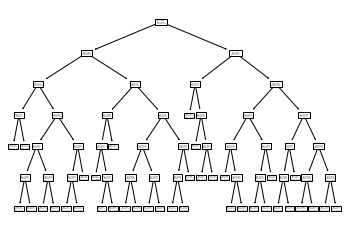

In [26]:
from sklearn import tree
DTC = tree.DecisionTreeClassifier(max_depth=6)
DTC = DTC.fit(Xtrain_prep, y)
y_predictionDTC = DTC.predict(Xtest_prep)
tree.plot_tree(DTC)
''

Сохранил обработанные датасеты для след домашки.

In [37]:
ytrain_prep = pd.DataFrame(y)

In [38]:
Xtrain_prep.to_pickle('xtrain.pkl')
Xtest_prep.to_pickle('xtest.pkl')
ytrain_prep.to_pickle('ytrain.pkl')